In [6]:
using Revise
using LilGuys
using CairoMakie, Arya
LP = LilGuys.Plots

LilGuys.Plots

In [1]:
models_dir = "/astro/dboyea/sculptor/"

"/astro/dboyea/sculptor/"

In [2]:
load_profile(name) = LilGuys.Profiles3D(joinpath(models_dir, "$name/out/profiles.hdf5"))

load_profile (generic function with 1 method)

In [3]:
t_max_host = 316 # computed with agama at peri=50.95 
M_max_host = 52.437
r_peri = 50.95
ρ_peri = M_max_host / (4π/3 * r_peri^3)

9.46491379338667e-5

## Orbit Profiles

In [16]:
model_names = [
    "V32_r5",
    "V32_r2.4",
   # "V50",
    "V50_r0.5", 
   # "V60_r5.4", 
   # "V70_r0.4"
]

3-element Vector{String}:
 "V32_r5"
 "V32_r2.4"
 "V50_r0.5"

In [17]:
profiles = load_profile.(["orbits/orbit1/1e6/"] .*  model_names);

In [18]:
labels = Dict(
    "V32_r5" => "V=32, r=5.6", 
    "V32_r2.4" => "V=32, r=2.4",
    "V50" => "V=50, r=10.8",
    "V50_r0.5" => "V=50, r=5.4", 
    "V60_r5.4" => "V=60, r=5.4", 
    "V70_r0.4" => "V=70, r=6.5"
    )

labels = [labels[name] for name in model_names]

3-element Vector{String}:
 "V=32, r=5.6"
 "V=32, r=2.4"
 "V=50, r=5.4"

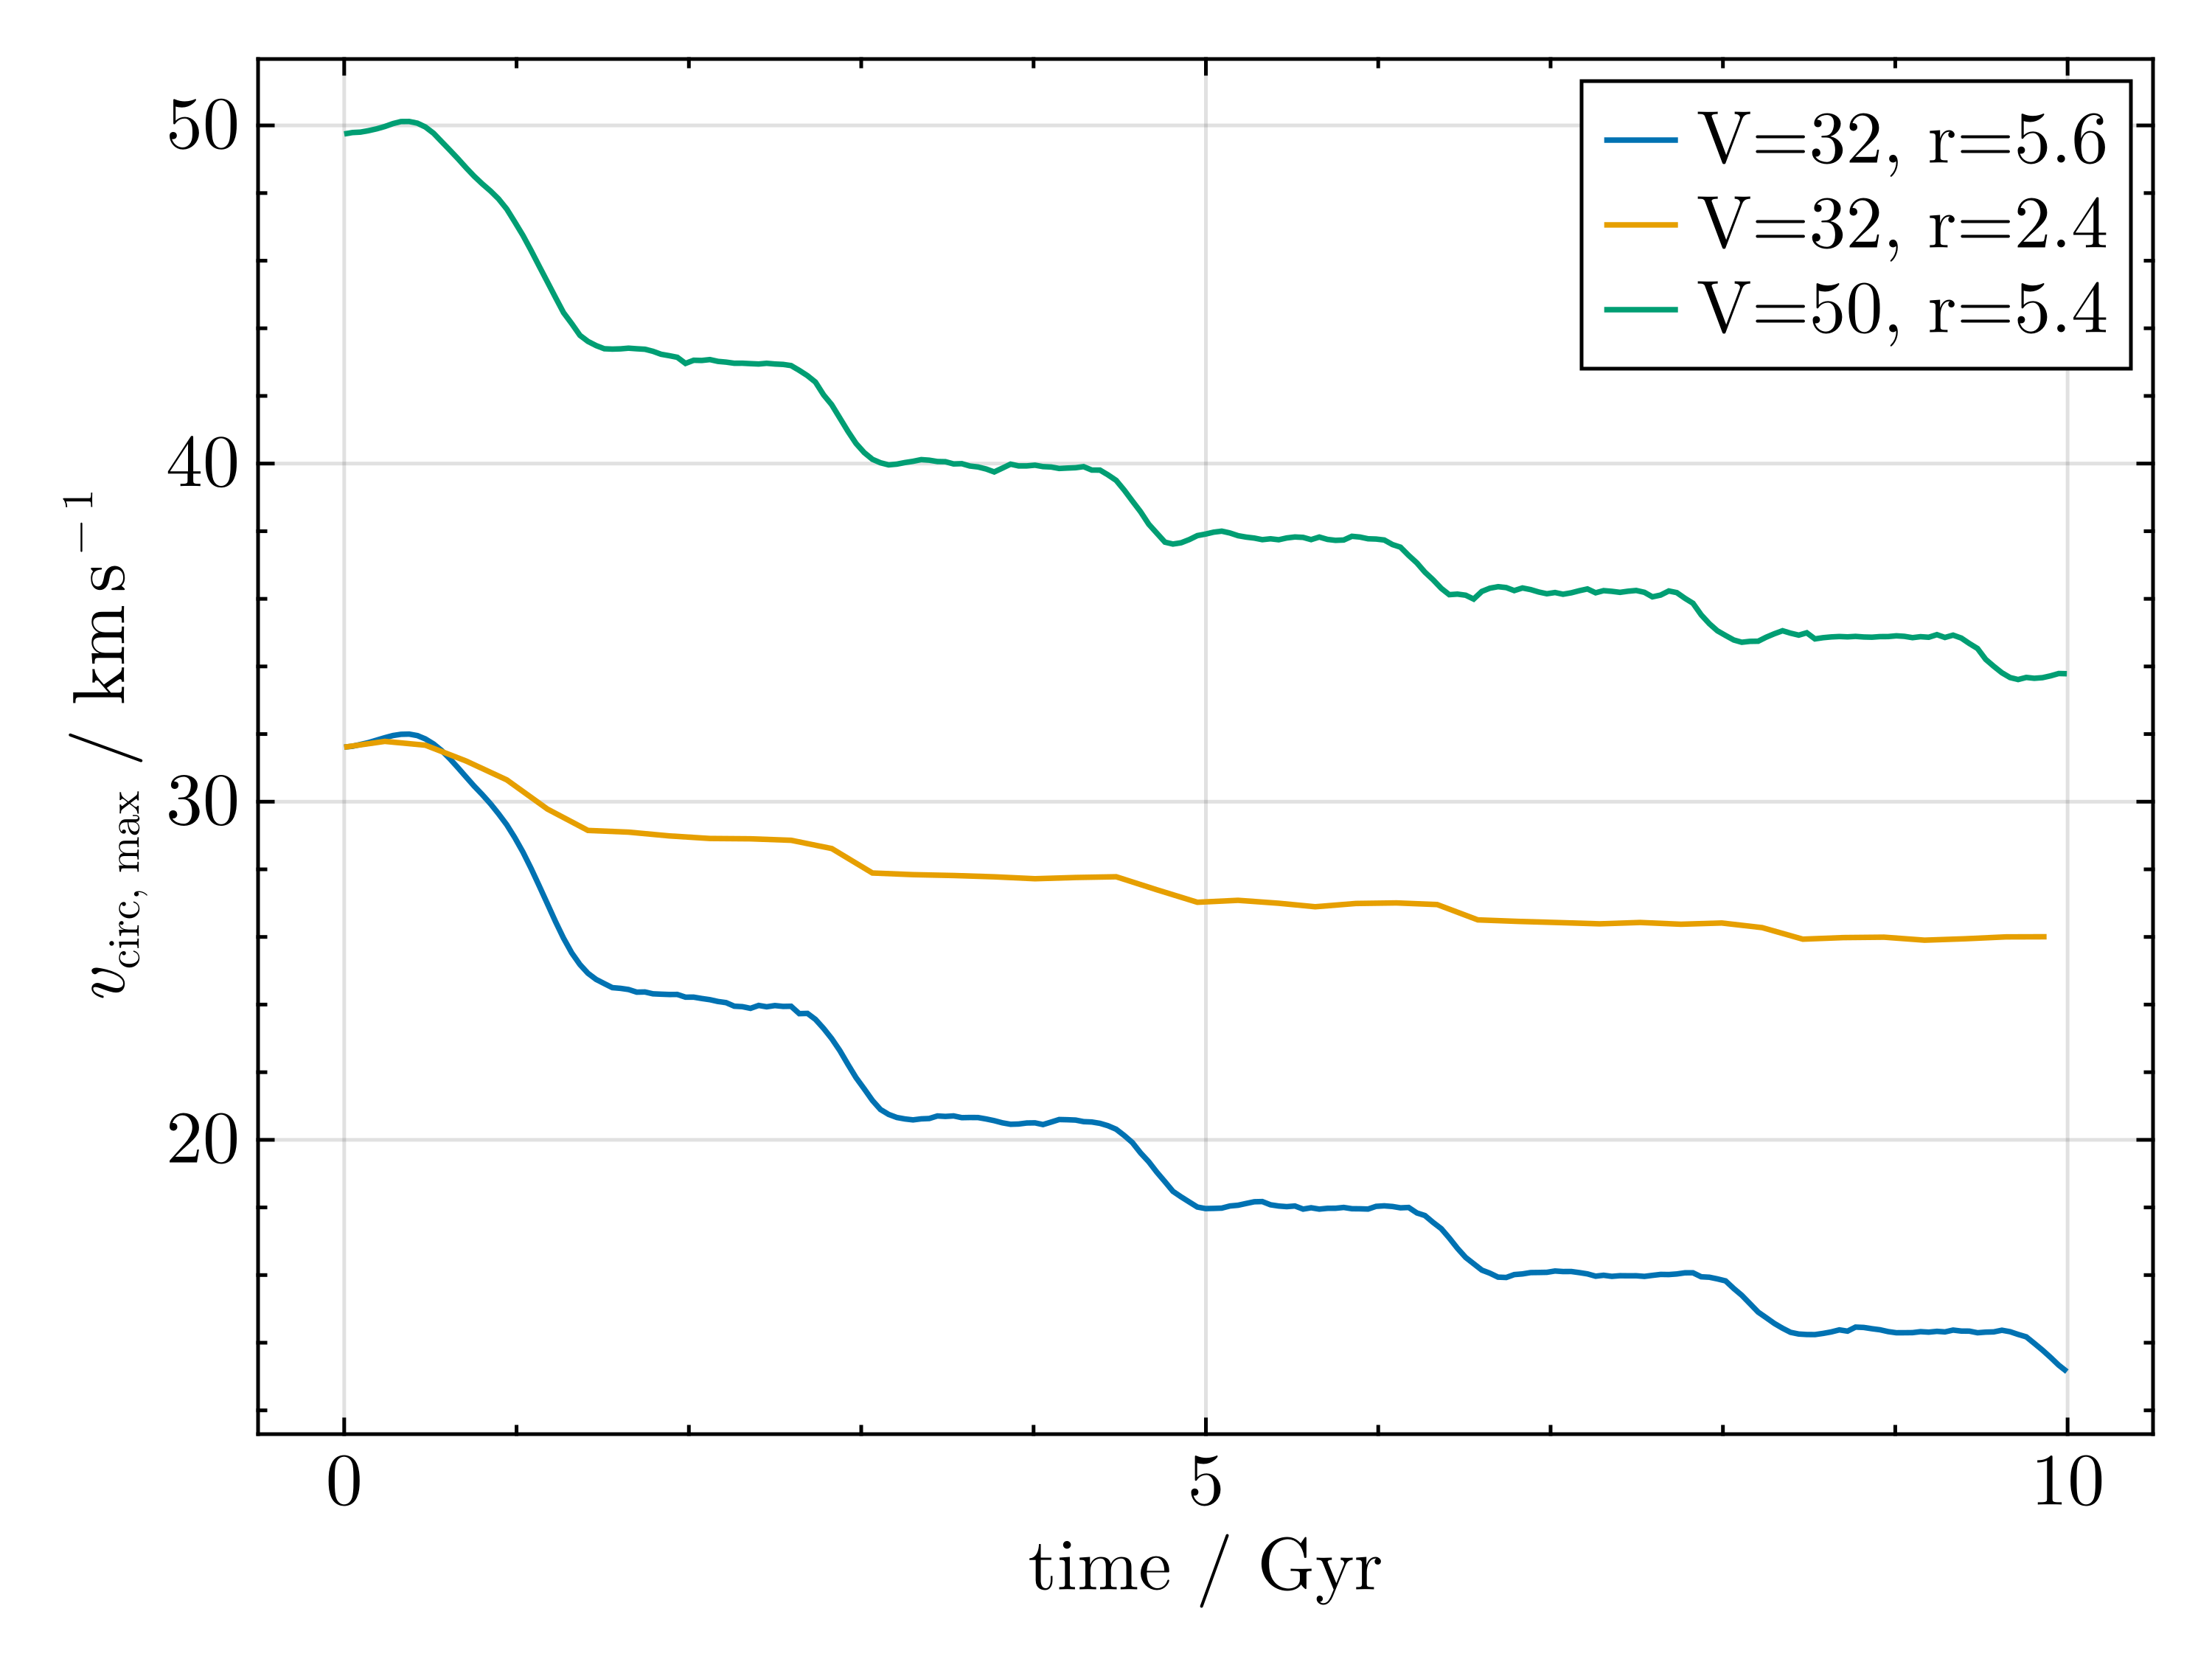

In [19]:
let
	fig, ax = FigAxis(
		xlabel="time / Gyr",
		ylabel = L"$v_\textrm{circ, max}$ / km\,s$^{-1}$"
	)


	for i in eachindex(profiles)
		
		vs = [p.v_circ_max for p in profiles[i].profiles]
		lines!(profiles[i].times * T2GYR, (vs * V2KMS), label=labels[i])
	end

	axislegend()
	fig
end

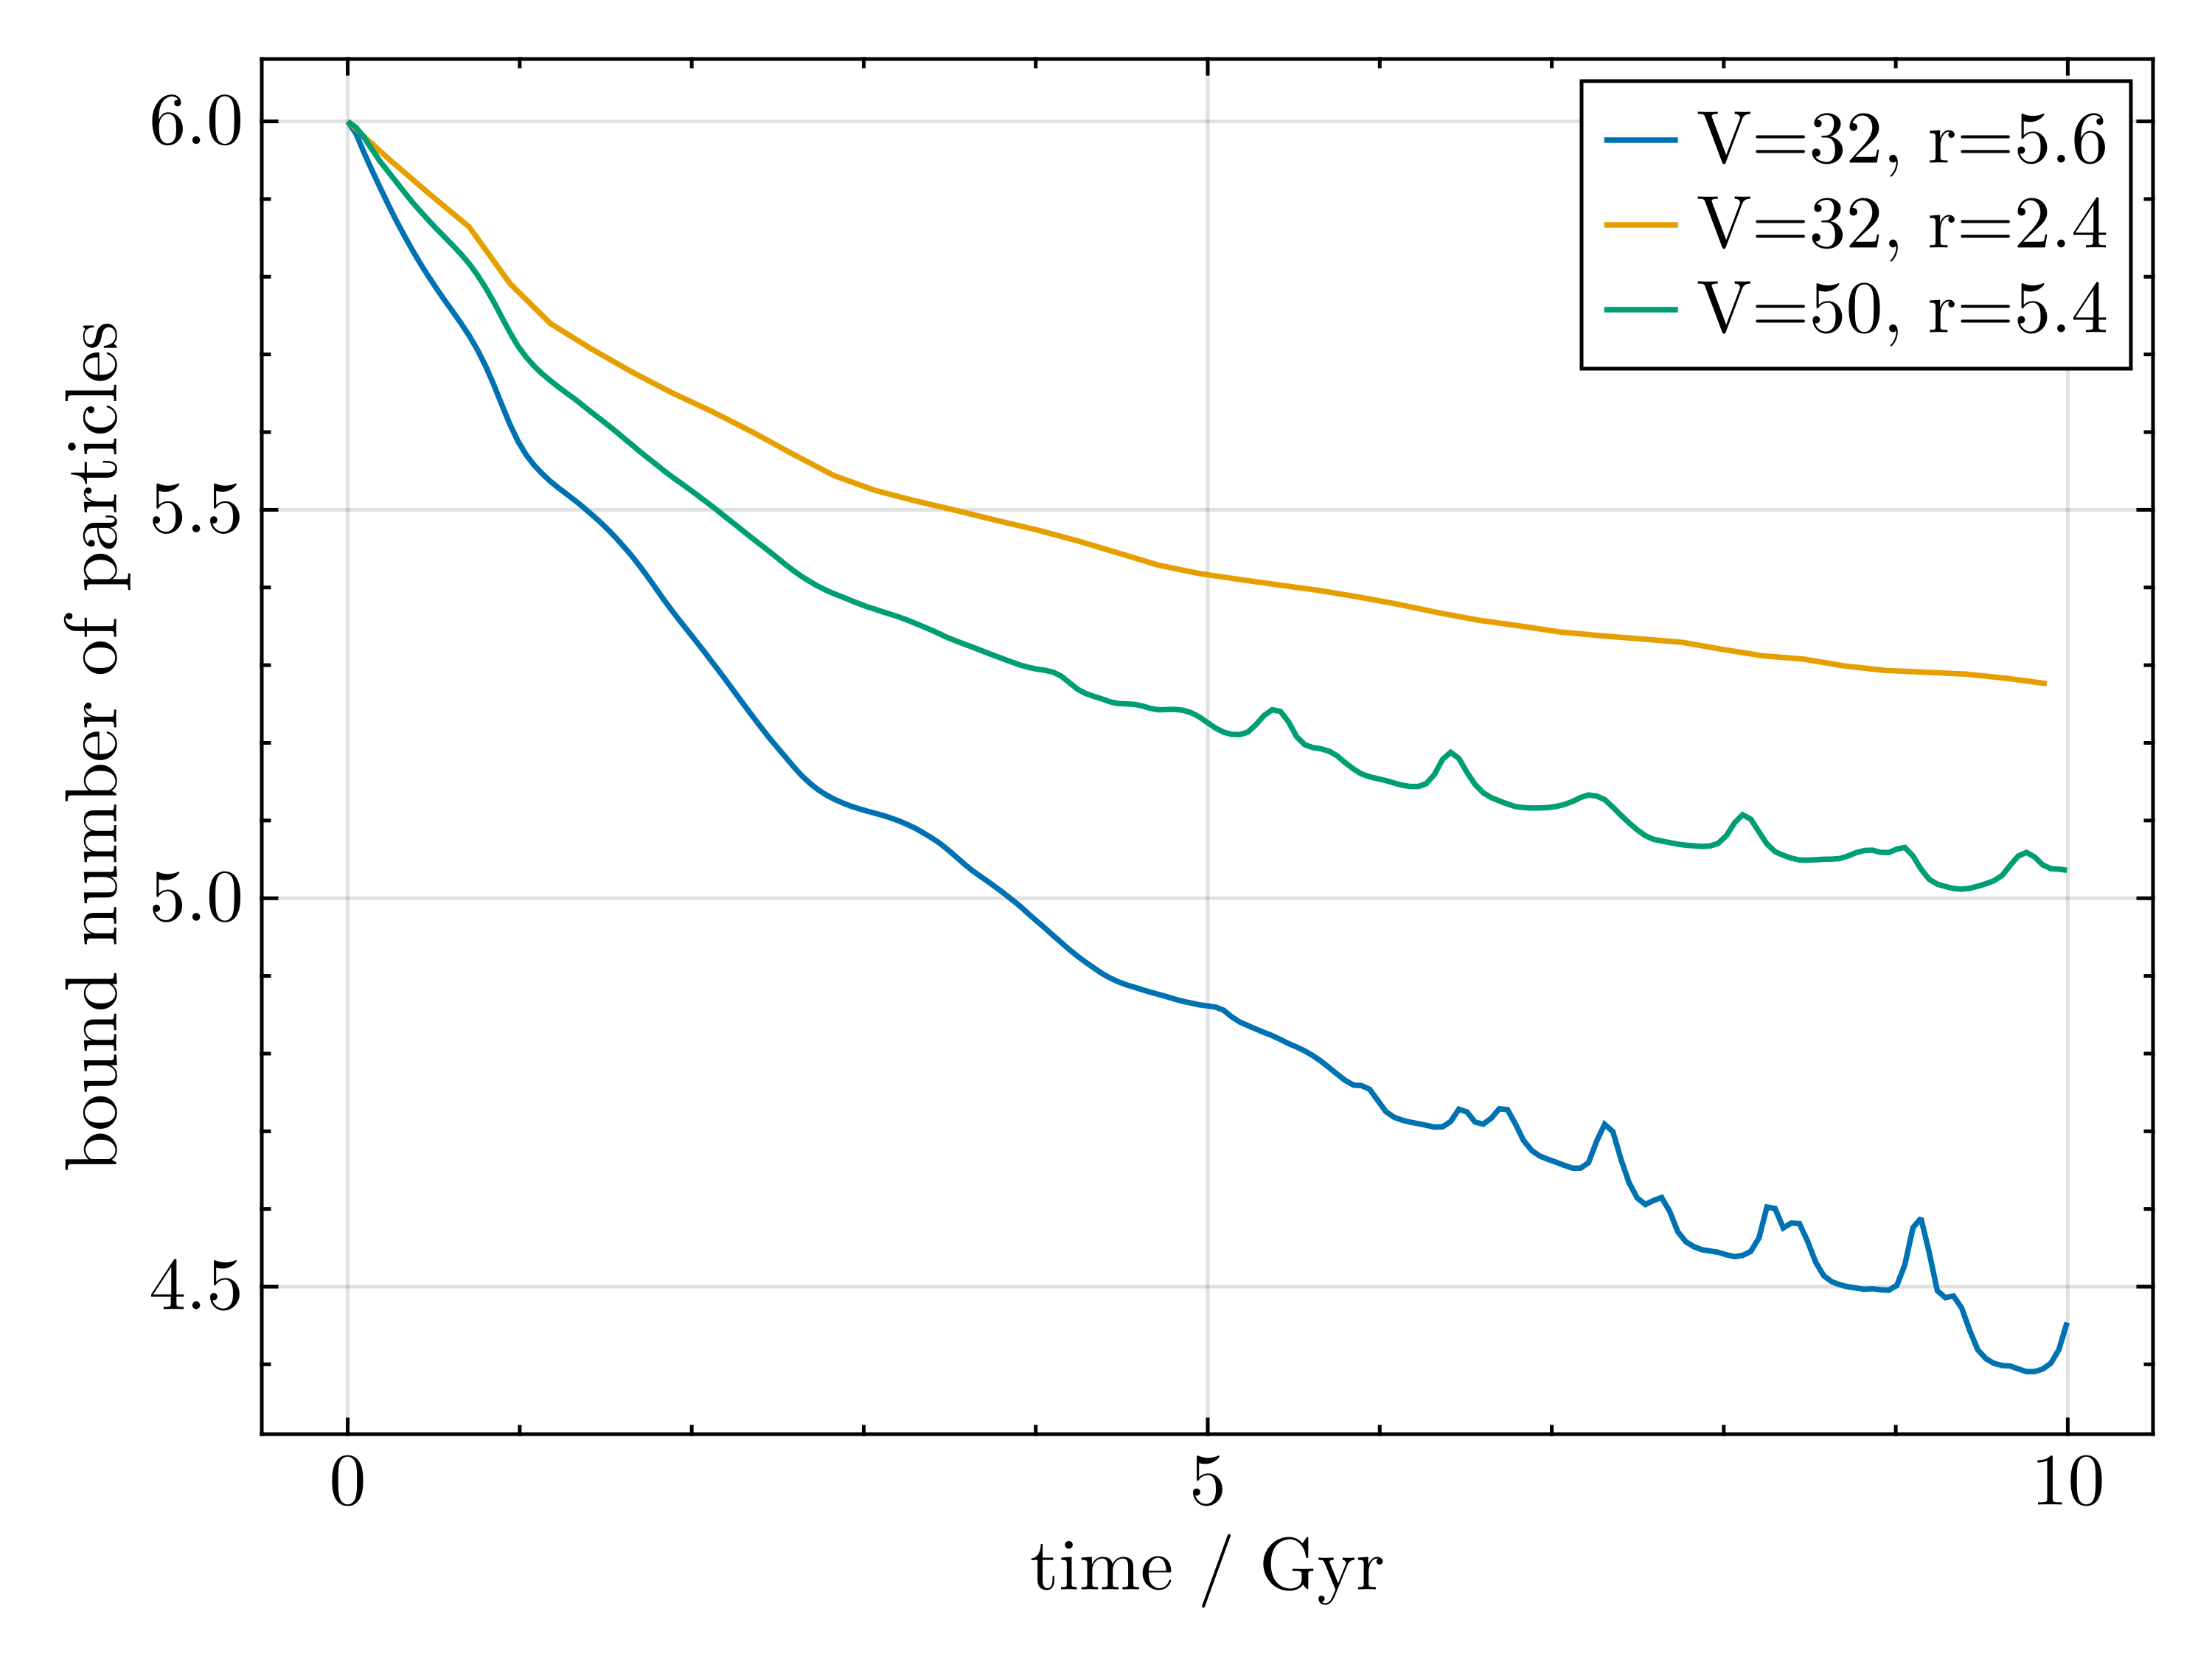

In [20]:
let
	fig, ax = FigAxis(
		xlabel="time / Gyr",
		ylabel = "bound number of particles",
	)

	for i in eachindex(profiles)
		
		vs = [p.N_bound for p in profiles[i].profiles]
		lines!(profiles[i].times * T2GYR, log10.(vs), label=labels[i])
	end

	axislegend()
	
	fig
end

In [ ]:
let
	fig, ax = FigAxis(
		xlabel=L"$\log\,r_\textrm{circ max}$ / kpc",
		ylabel = L"$\log\,v_\textrm{circ, max}$ / kpc",
	)

	for i in eachindex(profiles)
		profile = profiles[i]
		vs = [p.v_circ_max for p in profile.profiles]

		rs = [p.r_circ_max for p in profile.profiles]
		lines!(log10.(rs), log10.(vs * V2KMS), label=labels[i])
	end

	r = LinRange(1, 10, 100)
	v = 2π * r ./ (t_max_host /2)

	lines!(log10.(r), log10.(v * V2KMS), label=L"t=t_\textrm{max, host}/2", 
		color=:black, linestyle=:dot)

	axislegend(position=:rb)
	
	fig
end

In [ ]:
function t_max_of(prof)
	return 2π * prof.r_circ_max / prof.v_circ_max
end

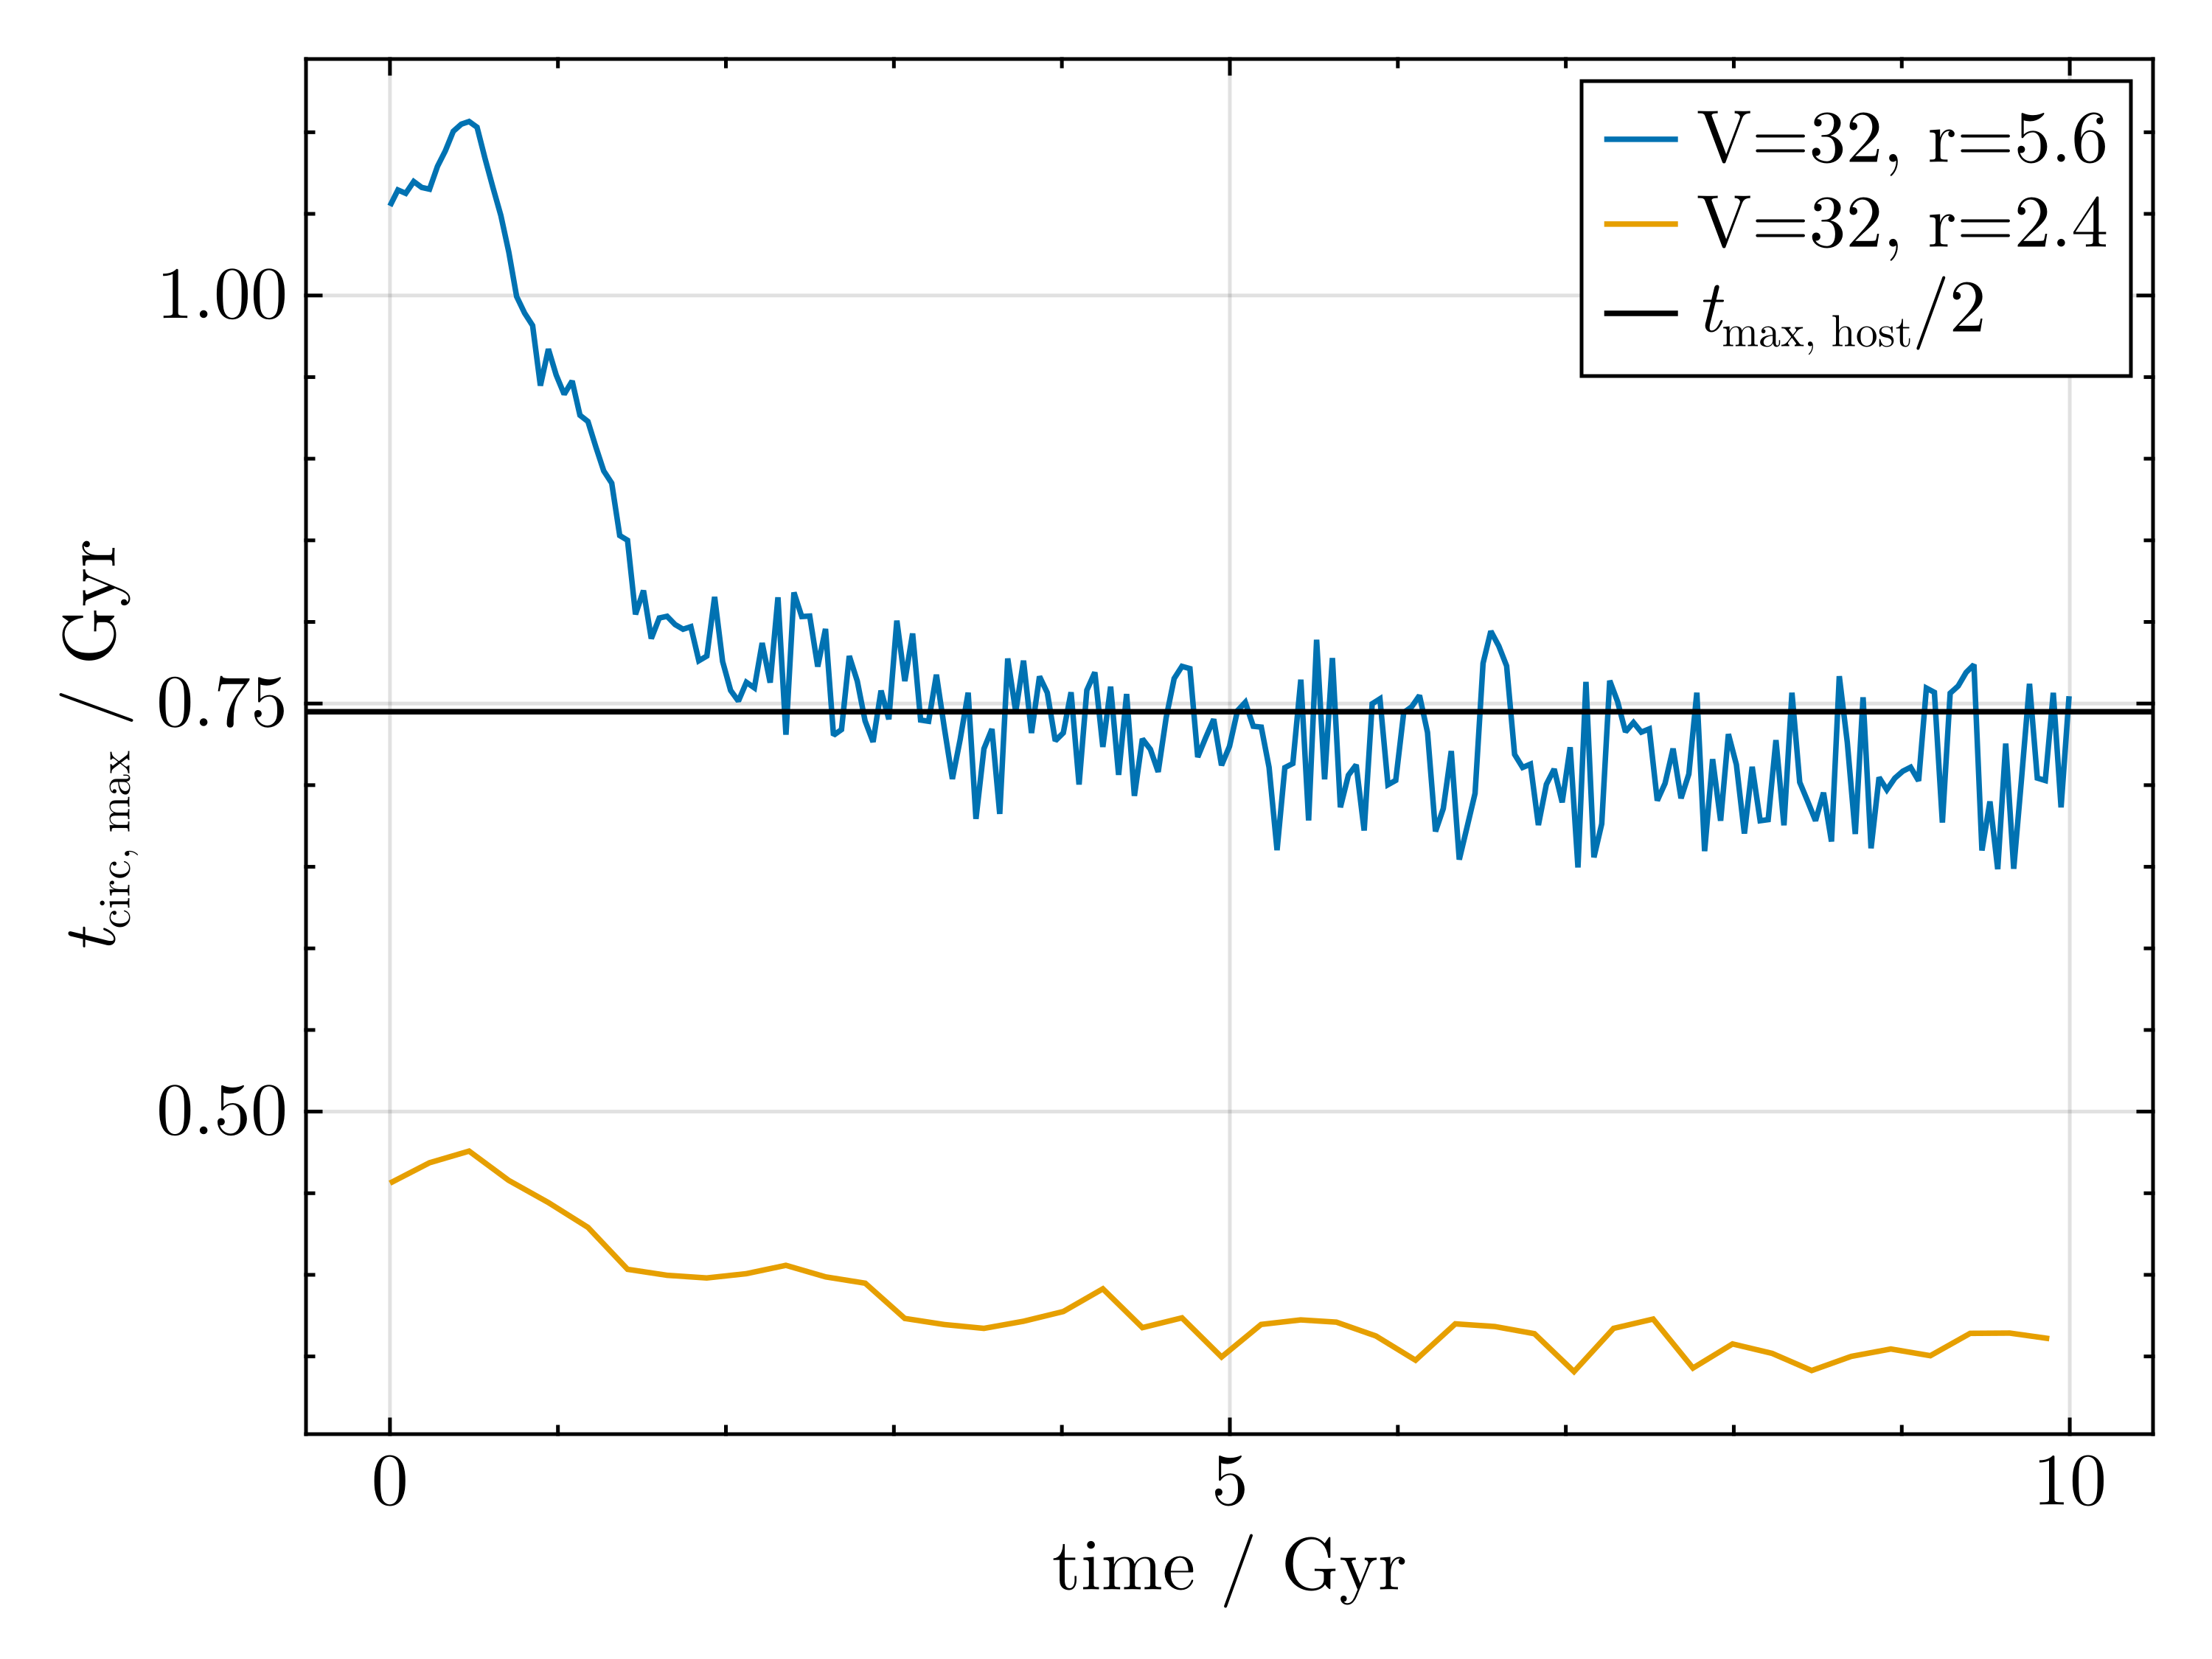

In [15]:
let
	fig, ax = FigAxis(
		xlabel="time / Gyr",
		ylabel = L"$t_\textrm{circ, max}$ / Gyr"
	)


	for i in eachindex(profiles)
		
		ts = t_max_of.(profiles[i].profiles)
		lines!(profiles[i].times * T2GYR, ts * T2GYR, label=labels[i])
	end

	hlines!(t_max_host * T2GYR / 2, color=:black, label=L"t_\textrm{max, host}/2")

	axislegend()
	fig
end

## Isolation convergence

In [4]:
readdir(models_dir * "/isolation/")

14-element Vector{String}:
 "1e4"
 "1e4.bak"
 "1e5"
 "1e6"
 "1e6_M0.8_c13"
 "1e6_rescaled"
 "1e6_s0.0014"
 "1e6_s0.014"
 "1e6_s0.3"
 "1e6_s1.4"
 "1e6_s3"
 "1e7"
 "param.txt"
 "scale.sh"

In [5]:
model_names = ["isolation/"] .* [
    "1e6_s0.0014",
    "1e6_s0.014",
    "1e6",
    "1e6_s1.4"
    ]

4-element Vector{String}:
 "isolation/1e6_s0.0014"
 "isolation/1e6_s0.014"
 "isolation/1e6"
 "isolation/1e6_s1.4"

In [14]:
profiles = load_profile.(model_names);

In [15]:
labels = [
    "0.0014",
    "0.014",
    "0.14",
    "1.4"
    ]

4-element Vector{String}:
 "0.0014"
 "0.014"
 "0.14"
 "1.4"

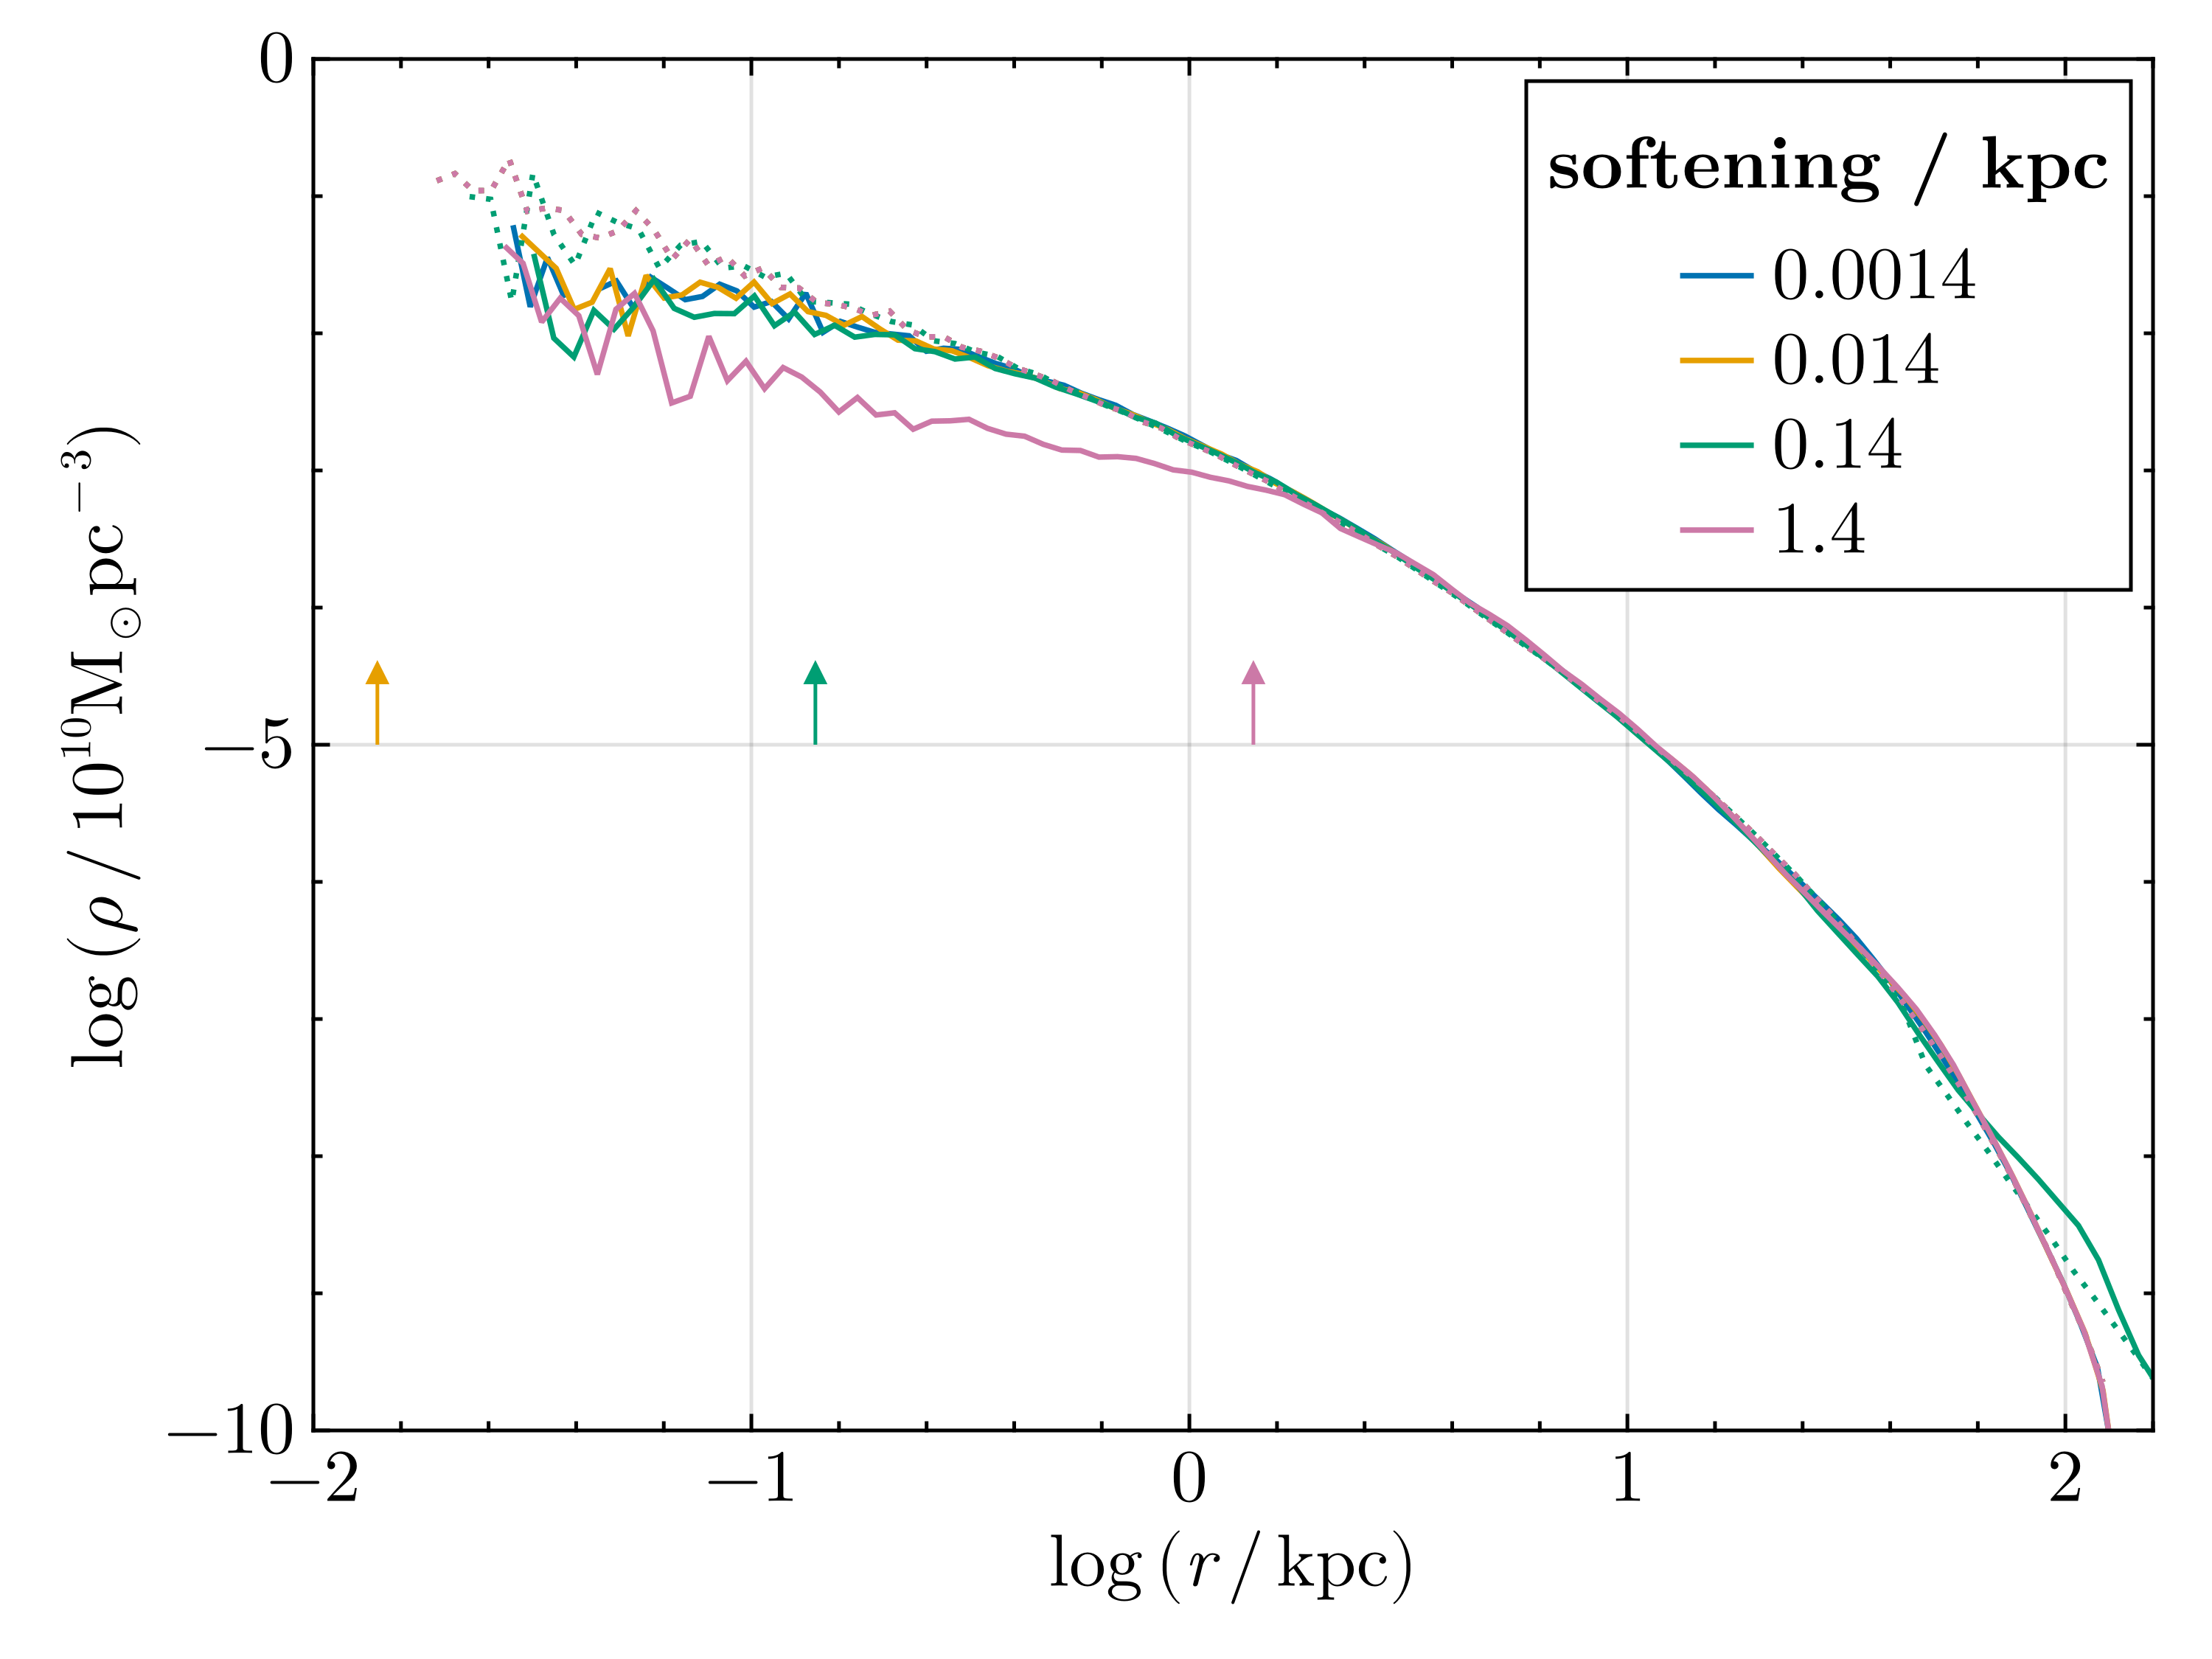

In [16]:
fig = Figure()
ax = LP.rho_axis(fig[1, 1])
ax.limits=(-2, 2.2, -10, 0)

pi = 1

for i in eachindex(profiles)
    
    profile = profiles[i][1]
    lines!(profile.log_r, log10.(profile.rho),
        linestyle=:dot,
        color=COLORS[i]
    )

    profile = profiles[i][end]
    lines!(profile.log_r, log10.(profile.rho), 
        color=COLORS[i],
        label=labels[i]
    )

    h = parse(Float64, labels[i])

    arrows!([log10(h)], [-5], [0], [0.5], color=COLORS[i])
end


axislegend(
    "softening / kpc"
)
fig

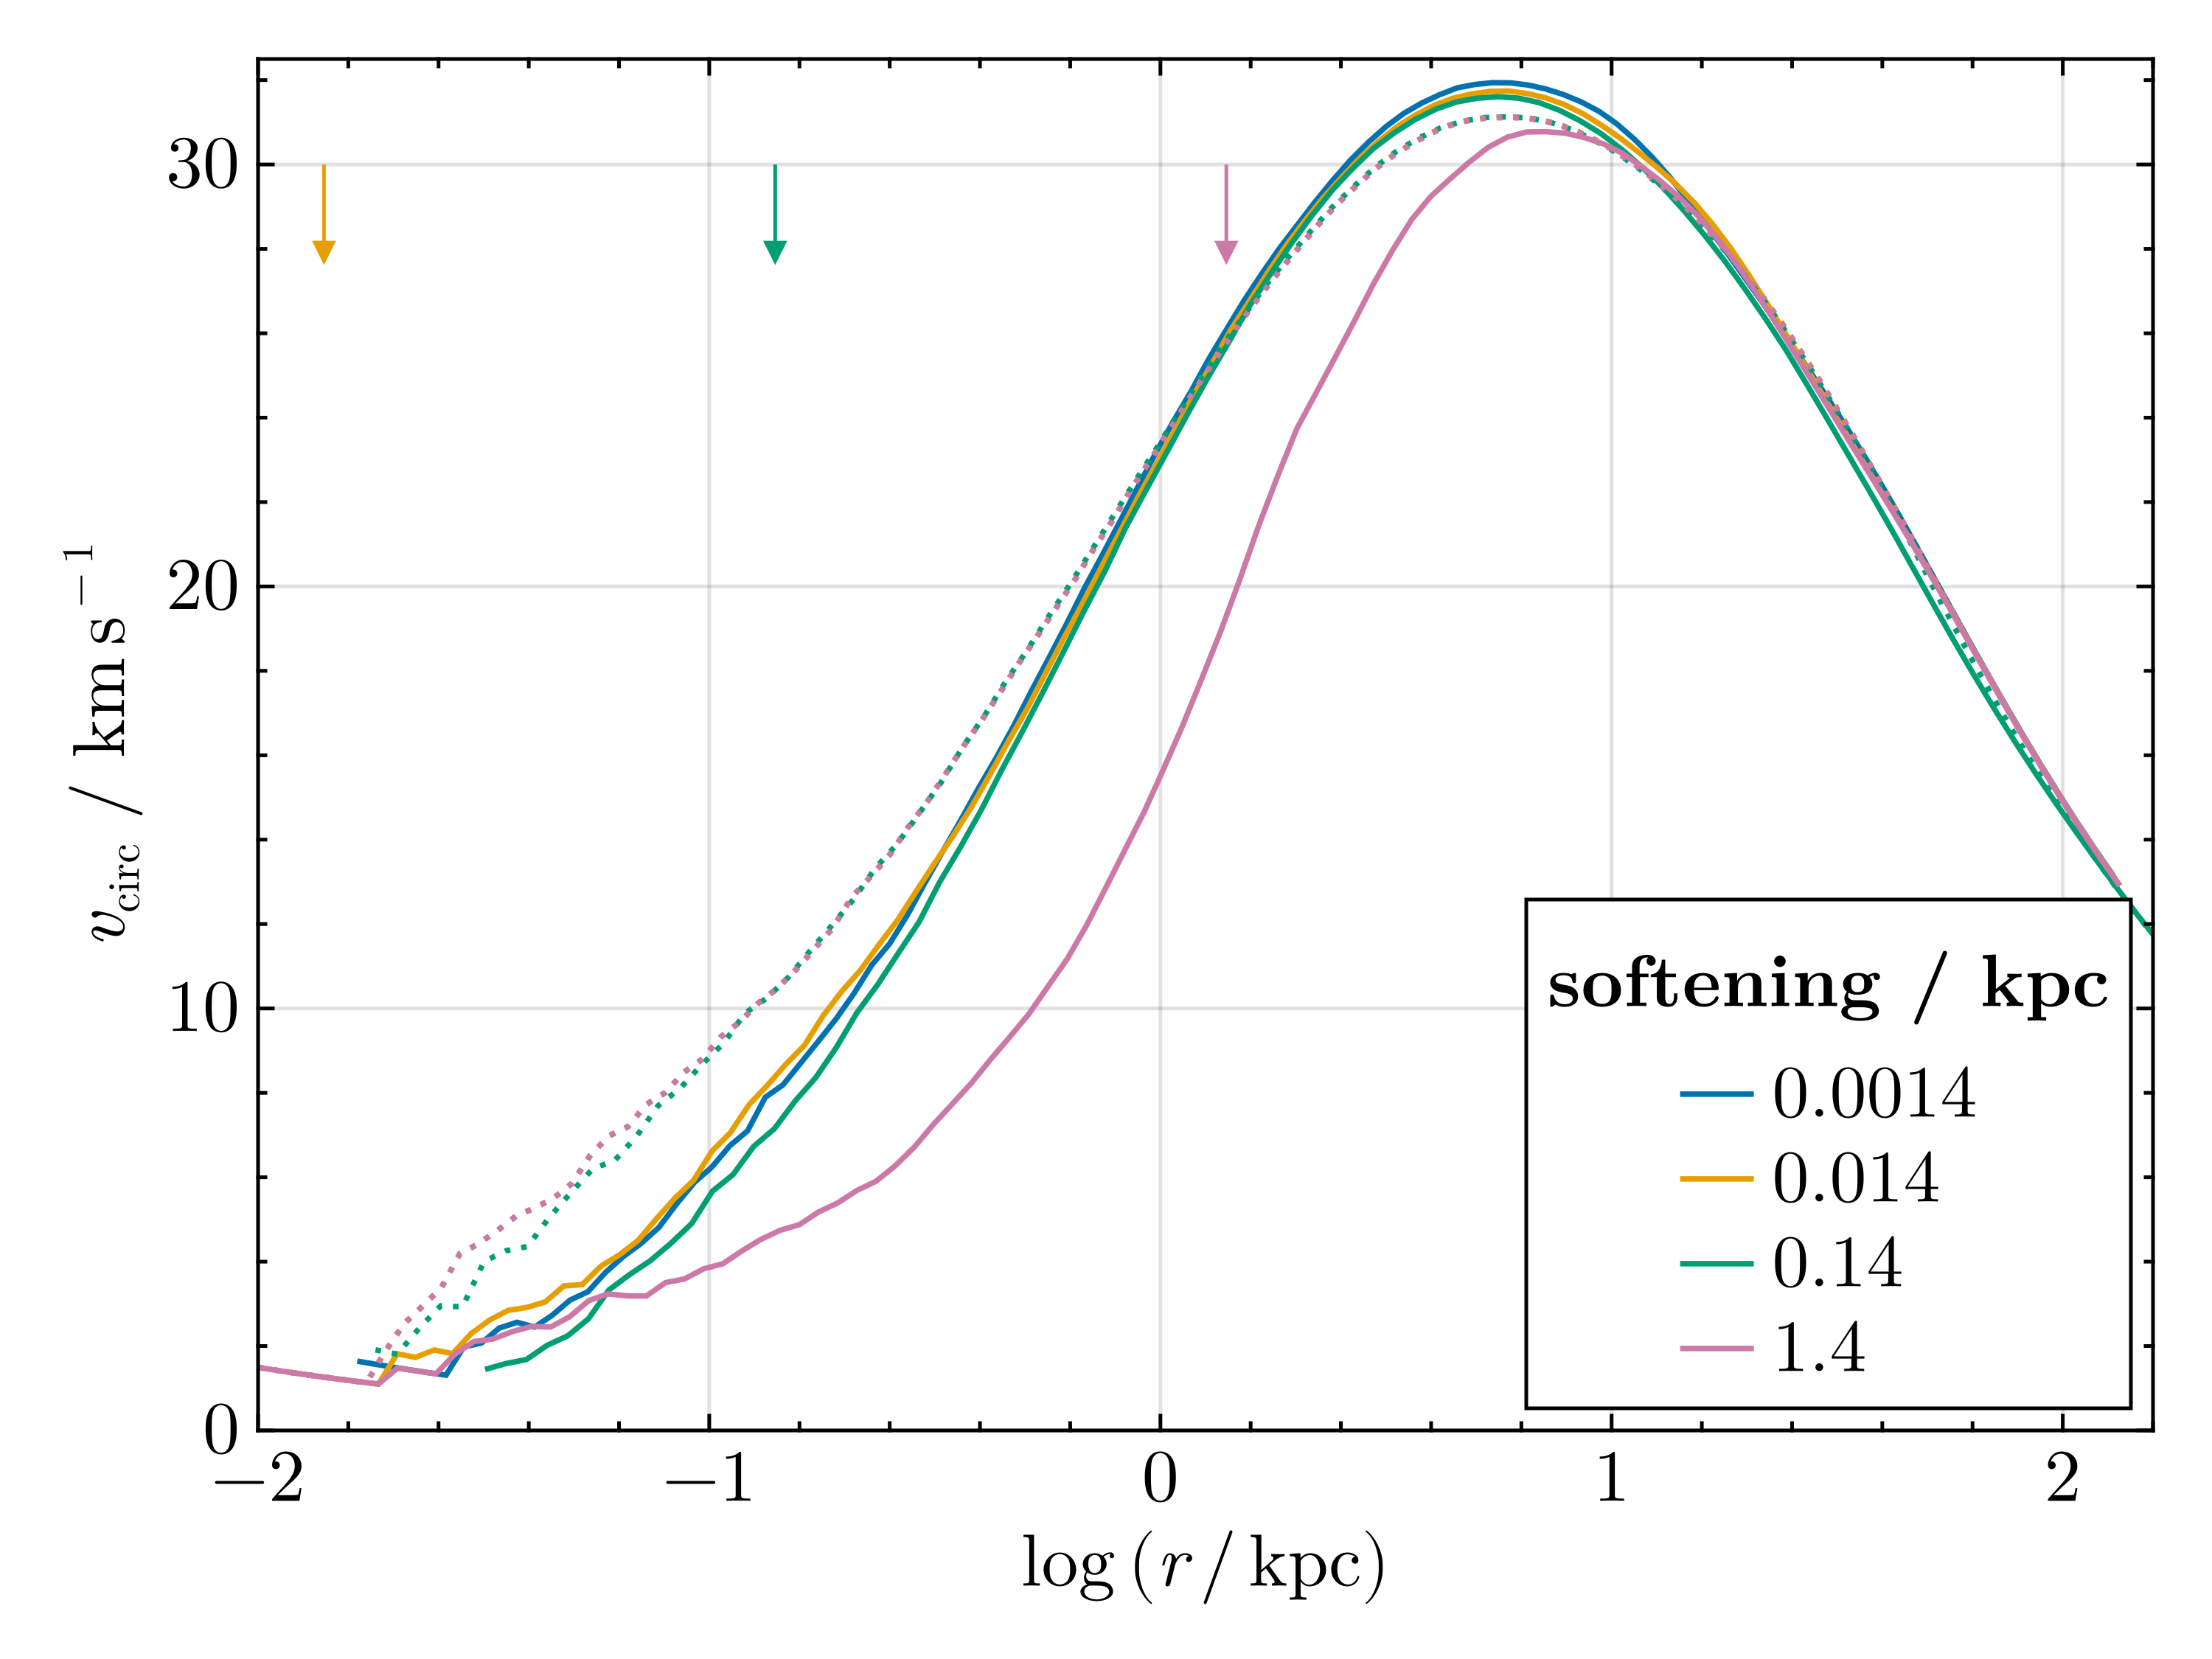

In [17]:
fig = Figure()
ax = Axis(fig[1, 1],
    xlabel=LP.log_r_label,
    ylabel=L"$v_\textrm{circ}$ / km\,s$^{-1}$",
    limits=(-2, 2.2, 0, 32.5),
    )
pi = 1

for i in eachindex(profiles)
    
    profile = profiles[i][1]
    lines!(profile.log_r, (profile.v_circ * V2KMS),
        linestyle=:dot,
        color=COLORS[i]
    )

    profile = profiles[i][end]
    lines!(profile.log_r, (profile.v_circ* V2KMS), 
        color=COLORS[i],
        label=labels[i]
    )

    h = parse(Float64, labels[i])
    arrows!([log10(h)], [30], [0], [-2], color=COLORS[i])

end


axislegend(
    "softening / kpc",
    position=:rb
)
fig

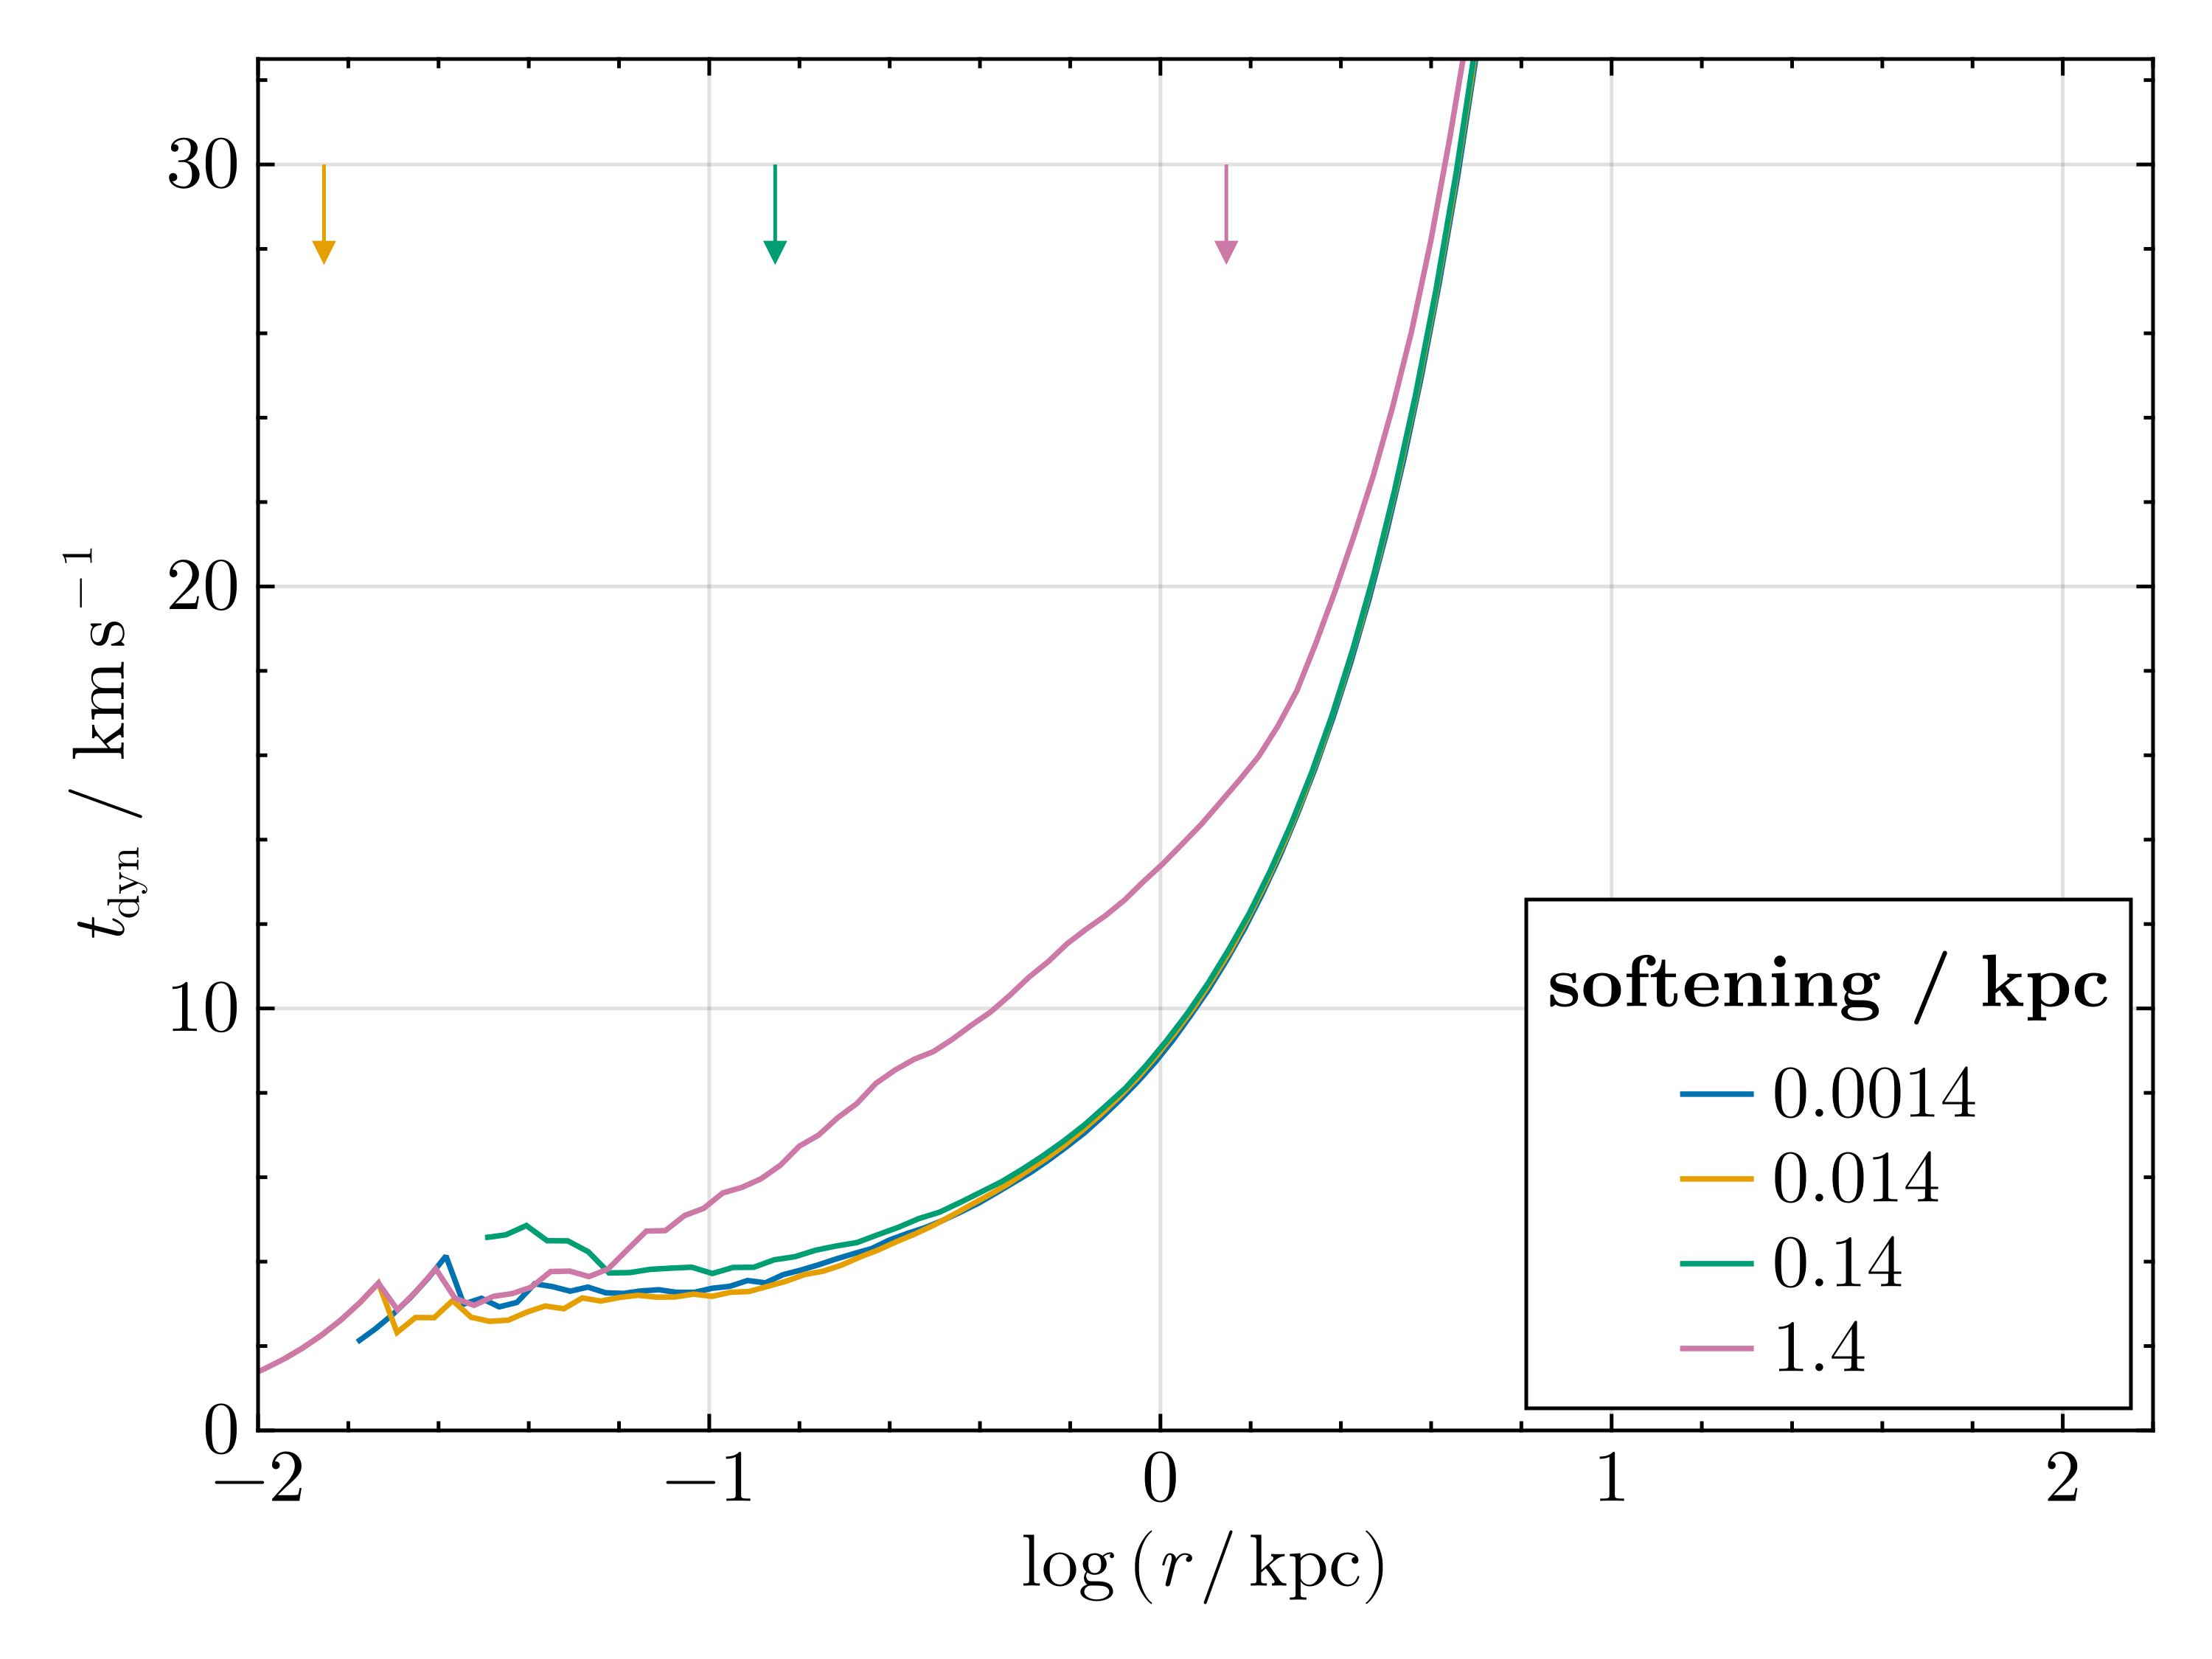

In [18]:
fig = Figure()
ax = Axis(fig[1, 1],
    xlabel=LP.log_r_label,
    ylabel=L"$t_\textrm{dyn}$ / km\,s$^{-1}$",
    limits=(-2, 2.2, 0, 32.5),
    )
pi = 1

for i in eachindex(profiles)
    
    profile = profiles[i][1]

    profile = profiles[i][end]
    lines!(profile.log_r, 10 .^ profile.log_r ./ (profile.v_circ), 
        color=COLORS[i],
        label=labels[i]
    )

    h = parse(Float64, labels[i])
    arrows!([log10(h)], [30], [0], [-2], color=COLORS[i])

end


axislegend(
    "softening / kpc",
    position=:rb
)
fig

# 1e7

In [10]:
model_dir = "/astro/dboyea/sculptor/isolation/1e7/out/"
profiles_c = LilGuys.Profiles3D("$model_dir/profiles.hdf5")
profiles_z = LilGuys.Profiles3D("$model_dir/profiles_z.hdf5");

In [13]:
profiles = [
    profiles_c,
    profiles_z,
    ];

In [15]:
labels = ["centred", "uncentred"]

2-element Vector{String}:
 "centred"
 "uncentred"

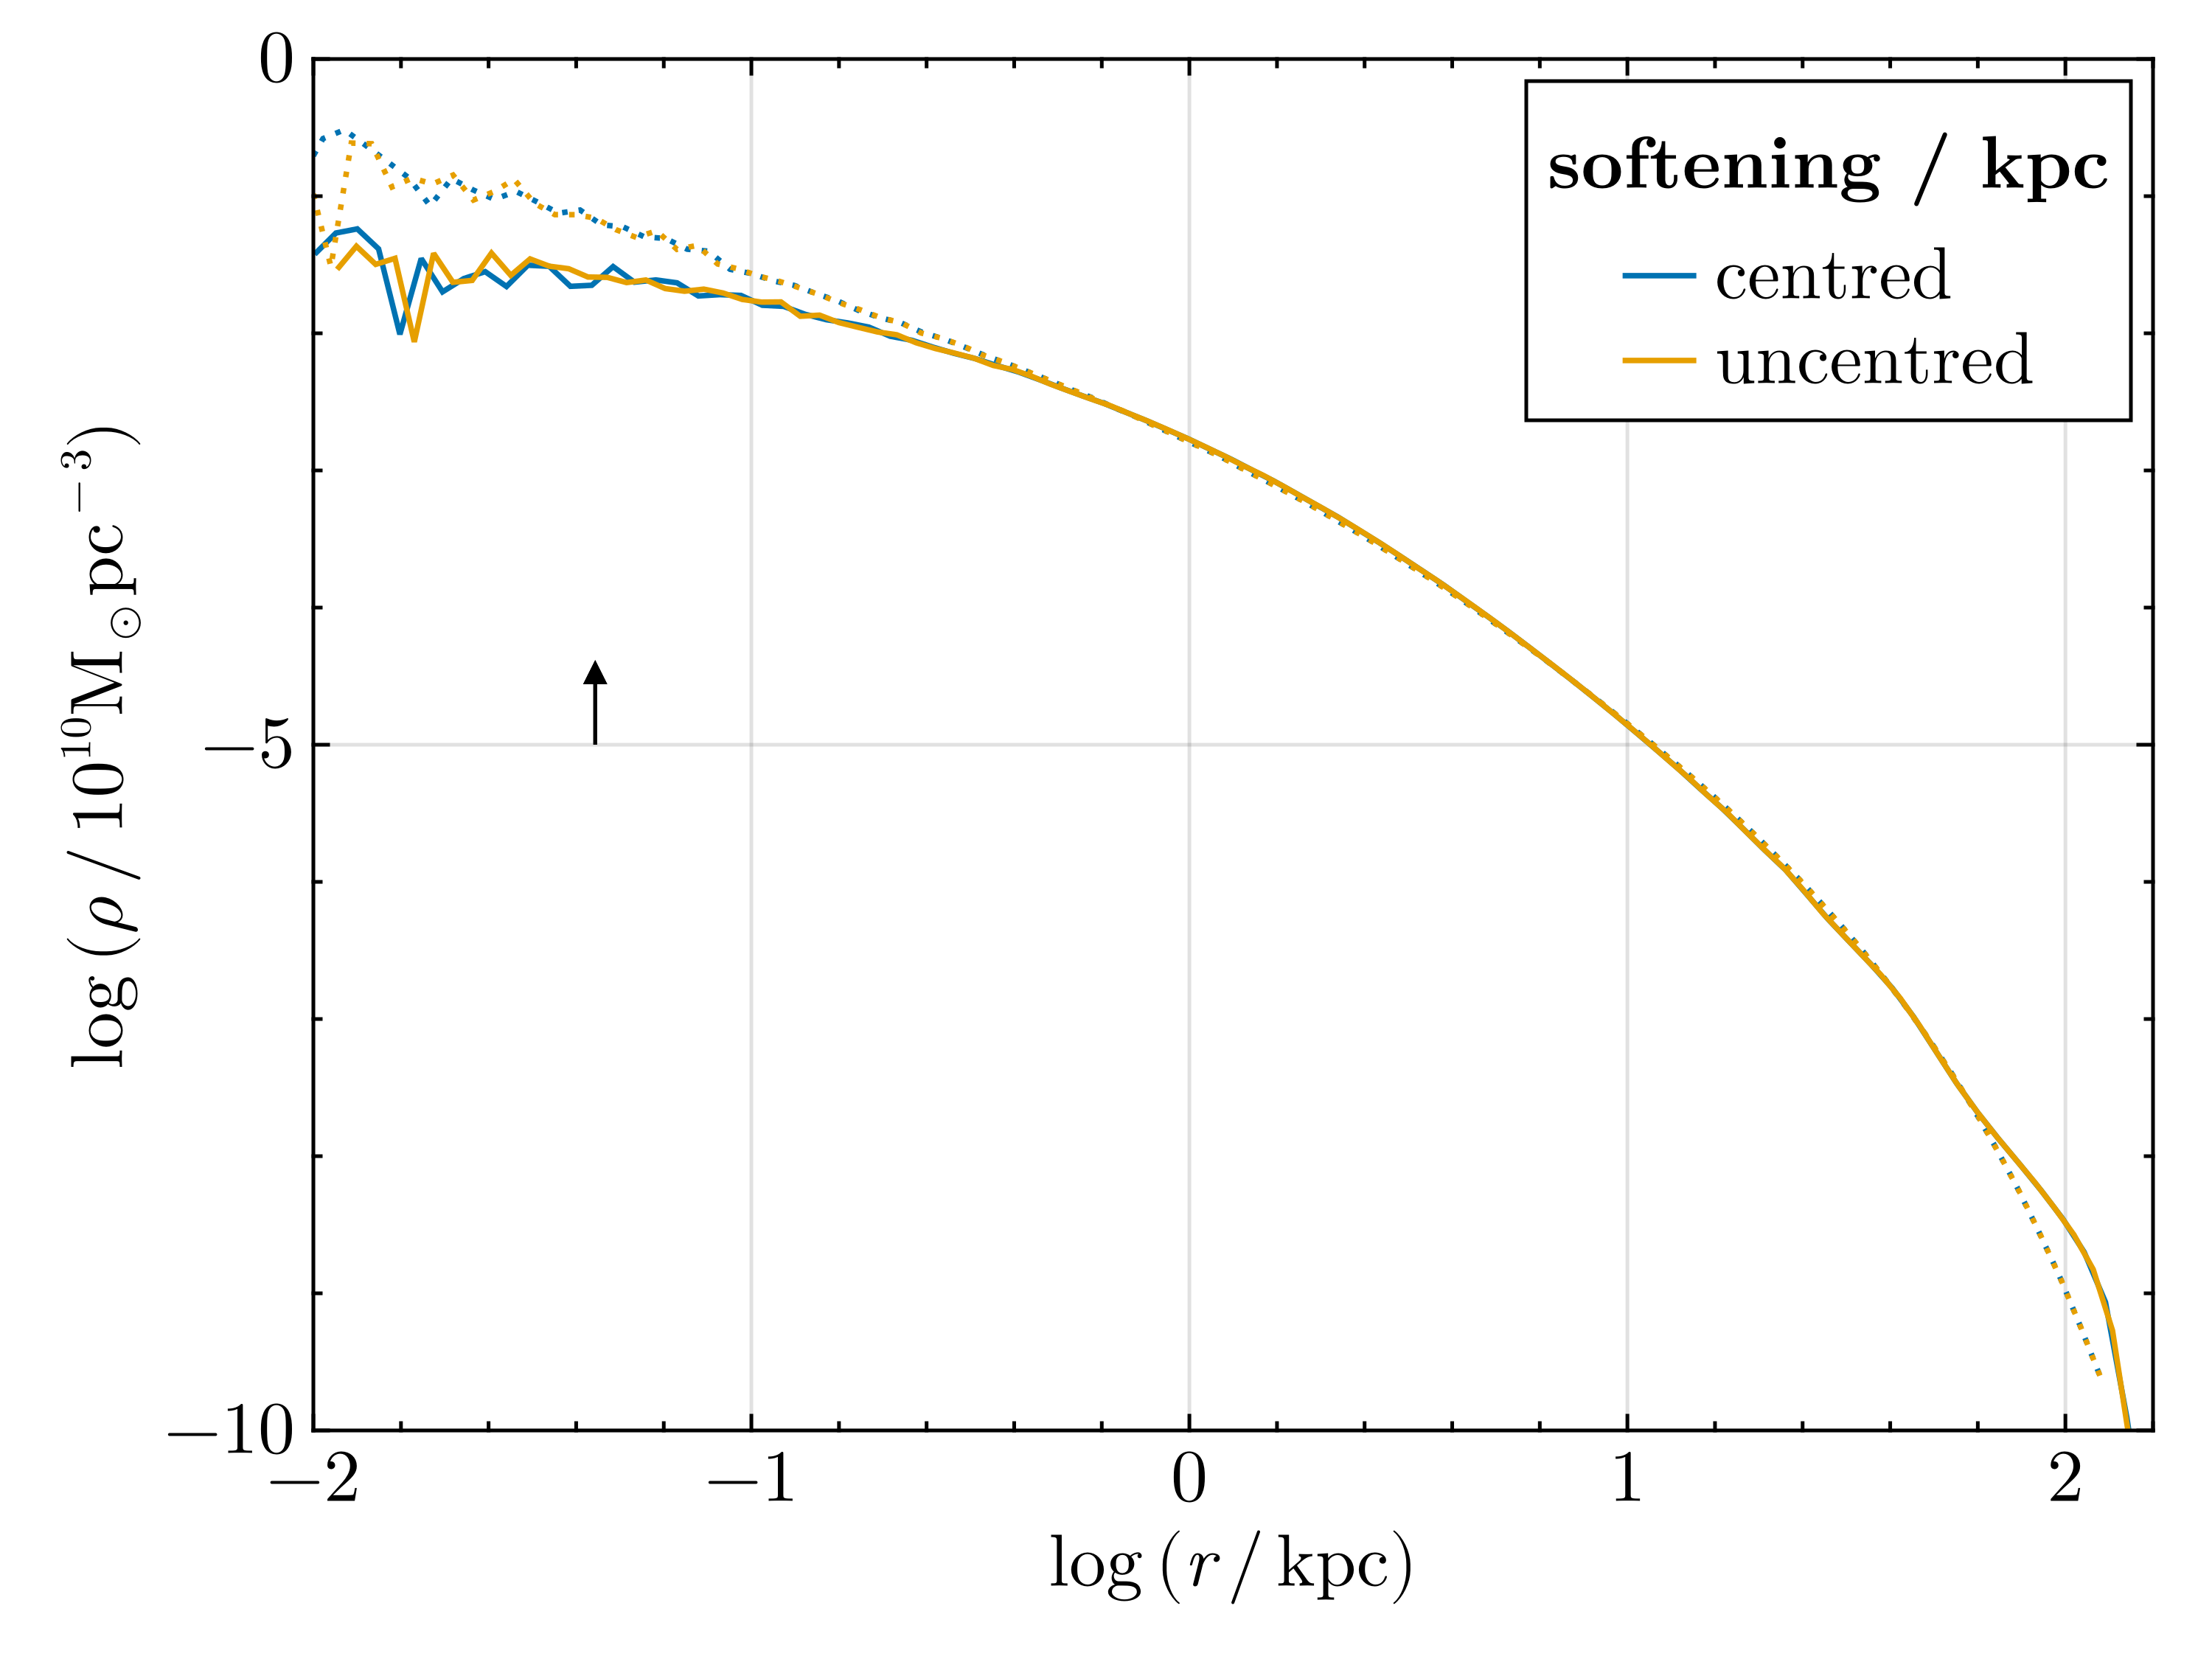

In [17]:
fig = Figure()
ax = LP.rho_axis(fig[1, 1])
ax.limits=(-2, 2.2, -10, 0)

pi = 1

for i in eachindex(profiles)
    
    profile = profiles[i][1]
    lines!(profile.log_r, log10.(profile.rho),
        linestyle=:dot,
        color=COLORS[i]
    )

    profile = profiles[i][end]
    lines!(profile.log_r, log10.(profile.rho), 
        color=COLORS[i],
        label=labels[i]
    )

    h = 0.044

    arrows!([log10(h)], [-5], [0], [0.5], color=:black)
end


axislegend(
    "softening / kpc"
)
fig